In [1]:
from neo4j import GraphDatabase, basic_auth
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import pandas as pd

In [2]:
load_dotenv()
DB_HOST = os.getenv("NEO4J_HOST")
DB_PORT = os.getenv("NEO4J_PORT")
DB_USER = os.getenv("NEO4J_USER")
DB_PASS = os.getenv("NEO4J_PASS")

In [3]:
driver = GraphDatabase.driver(f"bolt://{DB_HOST}:{DB_PORT}", auth=basic_auth(DB_USER, DB_PASS))
driver

In [4]:
query = """
    MATCH (n:Track)
    WITH
        toInteger(n.year) AS year,
        toInteger(n.artist_count) AS artist_count
    WHERE 2014 <= year AND year <= 2024
    RETURN
        year,
        artist_count,
        COUNT(*) AS count
    ;
"""
with driver.session() as session:
    result = session.run(query)
    data = [(d["year"], d["artist_count"], d["count"]) for d in result.data()]


In [5]:
df = pd.DataFrame(data, columns=['year', 'artist_count', 'count'])

df

,year,artist_count,count
0,2016,1,752305
1,2014,1,713790
2,2018,1,747965
3,2017,1,737222
4,2021,1,717749
5,2023,1,609755
6,2024,1,387691
7,2019,1,725232
8,2020,1,775080
9,2015,1,722938


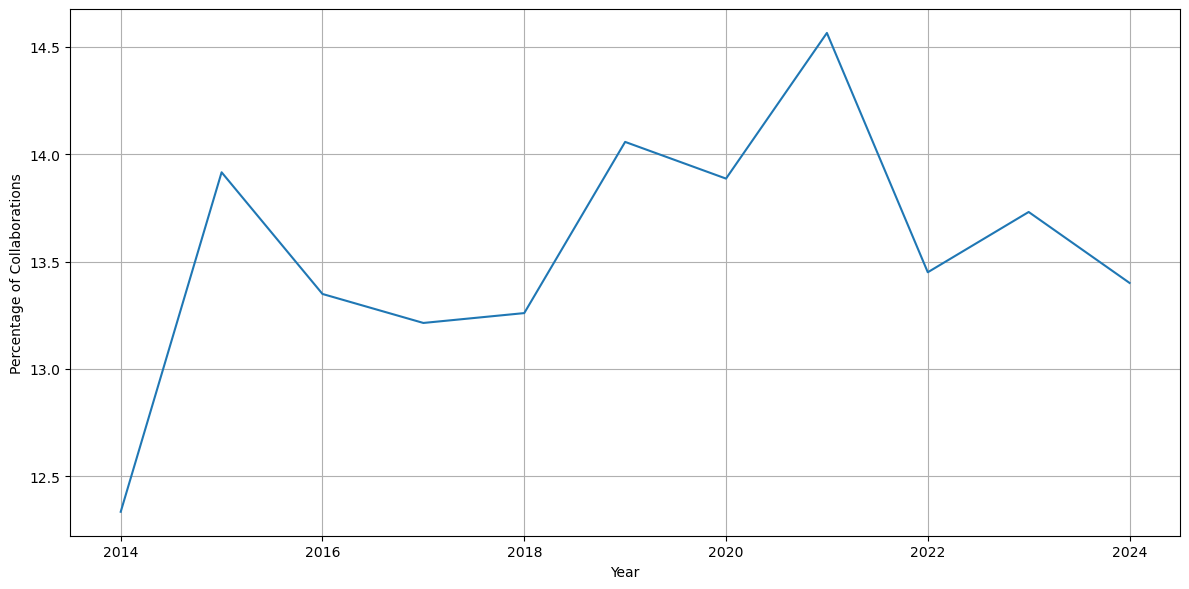

In [6]:
plt.figure(figsize=(12, 6))

total_counts = df.groupby('year')['count'].sum()
collab_counts = df[df['artist_count'] > 1].groupby('year')['count'].sum()
percentage_collabs = (collab_counts / total_counts) * 100
years = sorted(df['year'].unique())

plt.plot(years, percentage_collabs.reindex(years, fill_value=0))
plt.xlabel('Year')
plt.ylabel('Percentage of Collaborations')
plt.tight_layout()
plt.grid(True)
plt.show()

In [7]:
query = """
    MATCH (n:Track)
    WITH
        toInteger(n.year) AS year,
        toInteger(n.month) AS month,
        toInteger(n.artist_count) AS artist_count
    WHERE
        (year = 2020 AND month >= 3) OR
        (year = 2021 AND month <= 6)
    RETURN
        "COVID" AS period,
        artist_count,
        COUNT(*) AS count
    ;
"""
with driver.session() as session:
    result = session.run(query)
    data = [(d["period"], d["artist_count"], d["count"]) for d in result.data()]


In [8]:
query = """
    MATCH (n:Track)
    WITH
        toInteger(n.year) AS year,
        toInteger(n.month) AS month,
        toInteger(n.artist_count) AS artist_count
    WHERE
        (year = 2020 AND month < 3) OR
        (year < 2020)
    RETURN
        "preCOVID" AS period,
        artist_count,
        COUNT(*) AS count
    ;
"""
with driver.session() as session:
    result = session.run(query)
    data.extend([(d["period"], d["artist_count"], d["count"]) for d in result.data()])


In [9]:
query = """
    MATCH (n:Track)
    WITH
        toInteger(n.year) AS year,
        toInteger(n.month) AS month,
        toInteger(n.artist_count) AS artist_count
    WHERE
        (year > 2021) OR
        (year = 2021 AND month > 6)
    RETURN
        "postCOVID" AS period,
        artist_count,
        COUNT(*) AS count
    ;
"""
with driver.session() as session:
    result = session.run(query)
    data.extend([(d["period"], d["artist_count"], d["count"]) for d in result.data()])


In [10]:
data

[('COVID', 1, 1019407),
 ('COVID', 2, 134756),
 ('COVID', 3, 24896),
 ('COVID', 4, 6738),
 ('COVID', 5, 2678),
 ('preCOVID', 1, 18522487),
 ('preCOVID', 2, 1847115),
 ('preCOVID', 3, 304686),
 ('preCOVID', 4, 87140),
 ('preCOVID', 5, 30164),
 ('postCOVID', 1, 2022095),
 ('postCOVID', 2, 250472),
 ('postCOVID', 3, 53207),
 ('postCOVID', 4, 13685),
 ('postCOVID', 5, 4574)]

In [11]:
df2 = pd.DataFrame(data, columns=['period', 'artist_count', 'count'])

df2

,period,artist_count,count
0,COVID,1,1019407
1,COVID,2,134756
2,COVID,3,24896
3,COVID,4,6738
4,COVID,5,2678
5,preCOVID,1,18522487
6,preCOVID,2,1847115
7,preCOVID,3,304686
8,preCOVID,4,87140
9,preCOVID,5,30164


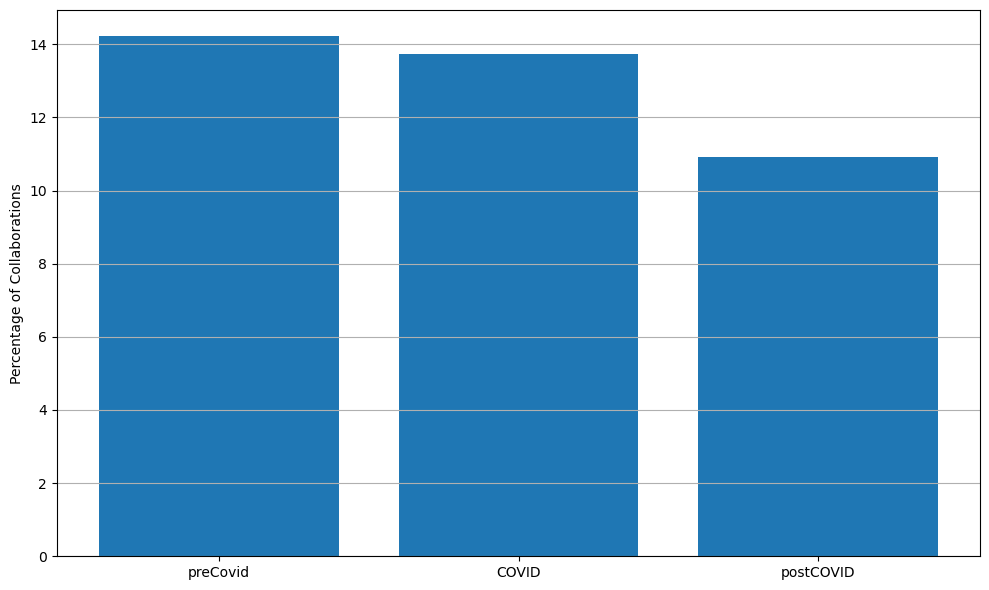

In [13]:
plt.figure(figsize=(10, 6))

total_counts = df2.groupby('period')['count'].sum()
collab_counts = df2[df2['artist_count'] > 1].groupby('period')['count'].sum()
percentage_collabs = (collab_counts / total_counts) * 100

plt.bar(["preCovid", "COVID", "postCOVID"], percentage_collabs)
plt.ylabel("Percentage of Collaborations")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


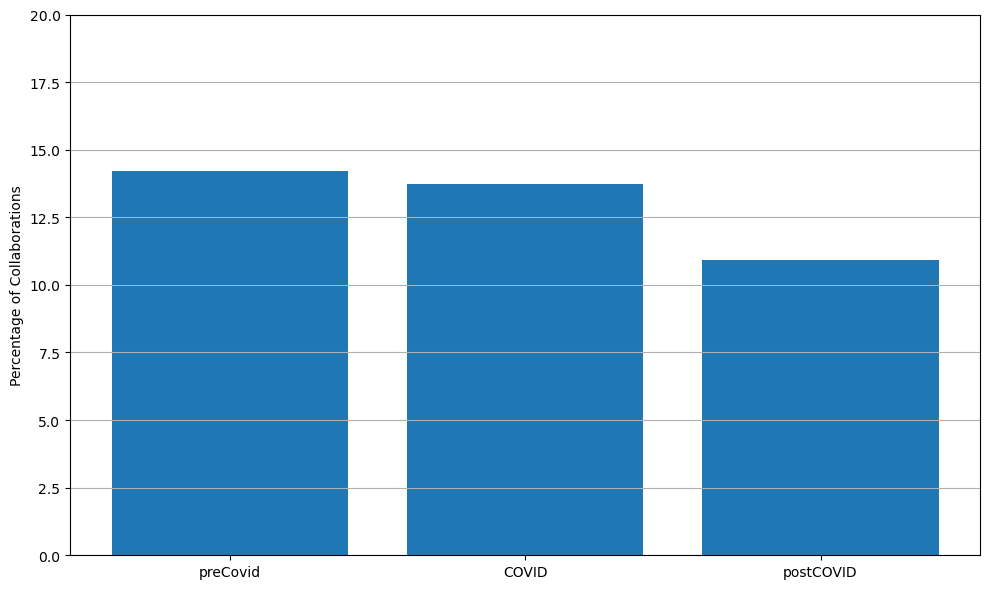

In [14]:
plt.figure(figsize=(10, 6))

total_counts = df2.groupby('period')['count'].sum()
collab_counts = df2[df2['artist_count'] > 1].groupby('period')['count'].sum()
percentage_collabs = (collab_counts / total_counts) * 100

plt.bar(["preCovid", "COVID", "postCOVID"], percentage_collabs)
plt.ylabel("Percentage of Collaborations")
plt.ylim((0, 20))
plt.grid(axis="y")
plt.tight_layout()
plt.show()


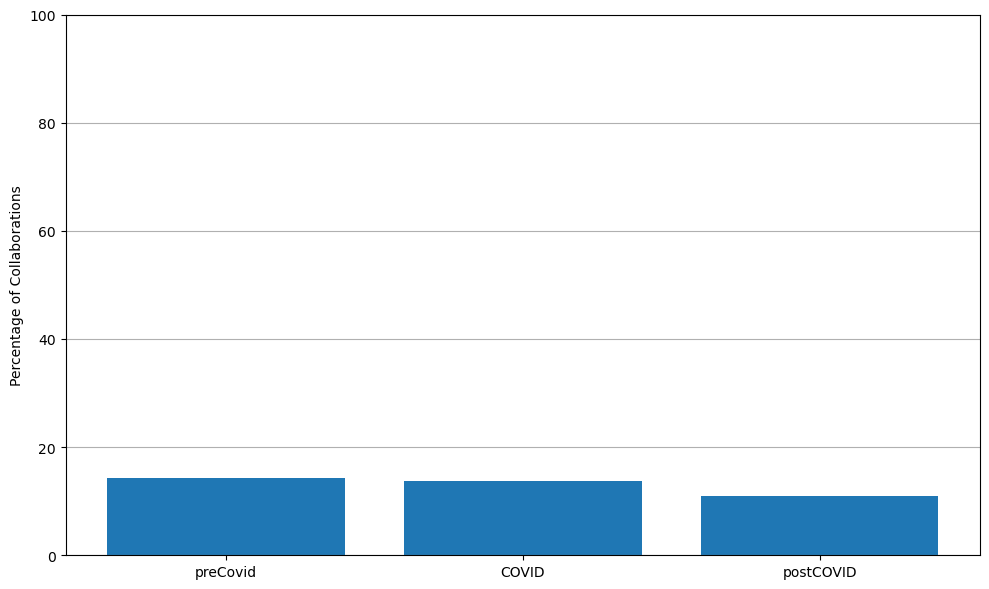

In [15]:
plt.figure(figsize=(10, 6))

total_counts = df2.groupby('period')['count'].sum()
collab_counts = df2[df2['artist_count'] > 1].groupby('period')['count'].sum()
percentage_collabs = (collab_counts / total_counts) * 100

plt.bar(["preCovid", "COVID", "postCOVID"], percentage_collabs)
plt.ylabel("Percentage of Collaborations")
plt.ylim((0, 100))
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [13]:
driver.close()